<a href="https://githubtocolab.com/pipeberrio/IA-UdeA/blob/main/01 - Exploraciondedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Scikit-learn
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Visualization
import matplotlib.pyplot as plt
import branca.colormap as cm
import seaborn as sns
import folium

# Models
from sklearn.ensemble import RandomForestRegressor


#librerias necesarias para la ejecución del proyecto.

In [ ]:
!pip install opendatasets
import opendatasets as od


In [ ]:
dataset_link= "https://www.kaggle.com/competitions/playground-series-s3e20"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

In [ ]:
import os
os.chdir("playground-series-s3e20")
os.listdir()

['test.csv', 'train.csv', 'sample_submission.csv']

In [ ]:
import pandas as pd
train1 = "train.csv"
train = pd.read_csv(train1)

In [ ]:
import pandas as pd
test1 = "test.csv"
test= pd.read_csv(test1)

In [ ]:
print(train['year'])

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
79018    2021
79019    2021
79020    2021
79021    2021
79022    2021
Name: year, Length: 79023, dtype: int64


In [ ]:
train.head()

#informacion sobre los datos de entrenamiento

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [ ]:
# Convierte la columna "year" en categórica
train['year'] = train['year'].astype('category')

# Verifica que "year" ahora es una variable categórica
print(train['year'].dtype)

print(train['year'])


#CONVERTIMOS LA VARIABLE YEAR EN CATEGORICA 1,2,3  RESPECTO A LOS AÑOS 2019,2020,2021

category
0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
79018    2021
79019    2021
79020    2021
79021    2021
79022    2021
Name: year, Length: 79023, dtype: category
Categories (3, int64): [2019, 2020, 2021]


In [ ]:
import plotly.express as px

train.describe().T\
    .style.bar(subset=['mean'], color=px.colors.qualitative.G10[2])\
    .background_gradient(subset=['std'], cmap='Greens')\
    .background_gradient(subset=['50%'], cmap='BuGn')

    # Mas informacion sobre los datos

,count,mean,std,min,25%,50%,75%,max
latitude,79023.000000,-1.891072,0.694522,-3.299000,-2.451000,-1.882000,-1.303000,-0.510000
longitude,79023.000000,29.880155,0.810375,28.228000,29.262000,29.883000,30.471000,31.532000
week_no,79023.000000,26.000000,15.297155,0.000000,13.000000,26.000000,39.000000,52.000000
SulphurDioxide_SO2_column_number_density,64414.000000,0.000048,0.000272,-0.000996,-0.000096,0.000024,0.000153,0.004191
SulphurDioxide_SO2_column_number_density_amf,64414.000000,0.834848,0.185382,0.241822,0.705817,0.809118,0.942792,1.885239
SulphurDioxide_SO2_slant_column_number_density,64414.000000,0.000035,0.000206,-0.000887,-0.000078,0.000019,0.000121,0.004236
SulphurDioxide_cloud_fraction,64414.000000,0.158418,0.071364,0.000000,0.110535,0.161855,0.211824,0.299998
SulphurDioxide_sensor_azimuth_angle,64414.000000,-7.925870,64.263368,-179.537059,-56.782383,-12.441726,72.059990,122.095200
SulphurDioxide_sensor_zenith_angle,64414.000000,37.436189,14.149950,0.099237,28.844520,37.784299,47.634875,66.242012
SulphurDioxide_solar_azimuth_angle,64414.000000,-83.833174,38.103737,-157.289337,-122.247621,-79.788767,-46.919229,-19.836636


In [ ]:
# VALORES FALTANTES EN EL TRAIN
100*train.isna().sum().sort_values(ascending = False) / train.shape[0]


UvAerosolLayerHeight_aerosol_height          99.444466
UvAerosolLayerHeight_solar_zenith_angle      99.444466
UvAerosolLayerHeight_solar_azimuth_angle     99.444466
UvAerosolLayerHeight_sensor_azimuth_angle    99.444466
UvAerosolLayerHeight_aerosol_pressure        99.444466
                                               ...    
latitude                                      0.000000
week_no                                       0.000000
year                                          0.000000
longitude                                     0.000000
emission                                      0.000000
Length: 76, dtype: float64

In [ ]:
# VALORES FALTANTES EN EL TEST
100*test.isna().sum().sort_values(ascending = False) / test.shape[0]


UvAerosolLayerHeight_aerosol_pressure         91.405576
UvAerosolLayerHeight_aerosol_optical_depth    91.405576
UvAerosolLayerHeight_sensor_zenith_angle      91.405576
UvAerosolLayerHeight_sensor_azimuth_angle     91.405576
UvAerosolLayerHeight_aerosol_height           91.405576
                                                ...    
latitude                                       0.000000
week_no                                        0.000000
year                                           0.000000
longitude                                      0.000000
ID_LAT_LON_YEAR_WEEK                           0.000000
Length: 75, dtype: float64

In [ ]:
# Número de valores faltantes para cada año
train.isnull().groupby(train['year']).sum().sum(axis=1)

year
2019    309254
2020    333338
2021    347499
dtype: int64

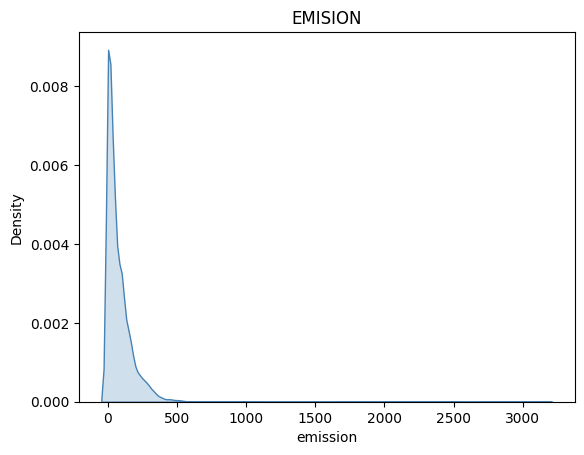

In [ ]:
# MIRAMOS EL COMPORTAMIENTO DE LA VARIABLE DE INTERES EMISION
sns.kdeplot(data = train, x = 'emission', fill = True, color = 'steelblue').set_title('EMISION');


#valores sesgados a la derecha

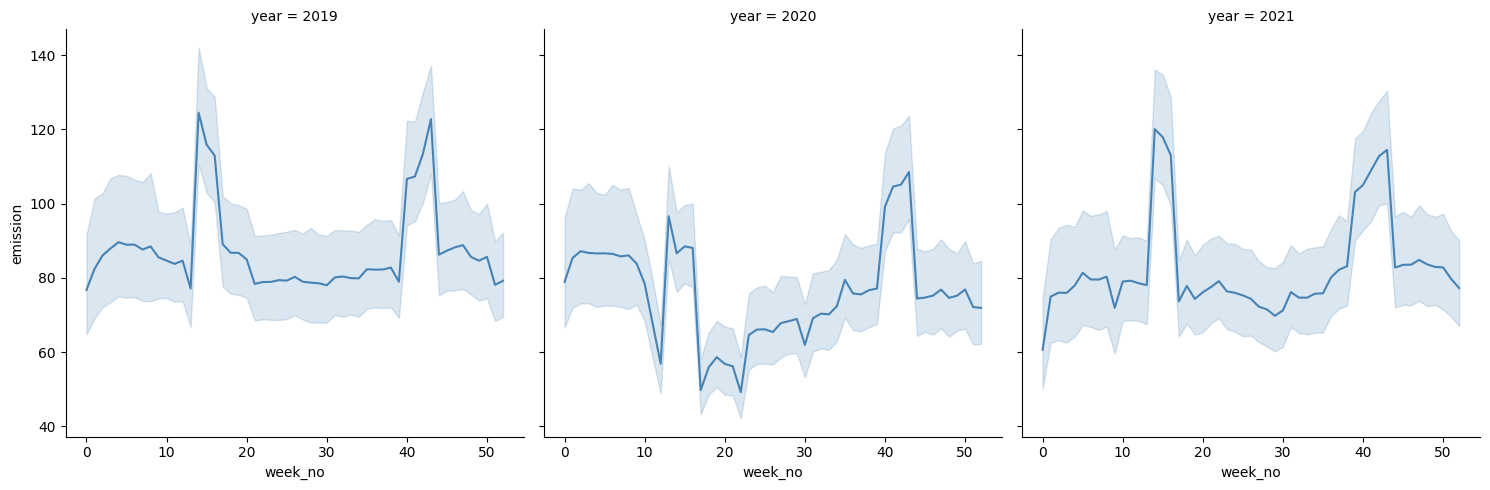

In [ ]:
#visualizamos las emisiones promedio por semana del año.

sns.relplot(data = train, x = 'week_no', y = 'emission', col = 'year', kind = 'line', color = 'steelblue');

#De lo anterior, vemos lo siguiente: En 2019, 2020 y 2021, las semanas 14, 15, 16, 41, 42 y 42 aproximadamente aumentan.
#Las emisiones en 2019 y 2021 son similares. Las emisiones en 2020 son diferentes a las de los otros dos años (probablemente debido a la pandemia del COVID).

<Axes: >

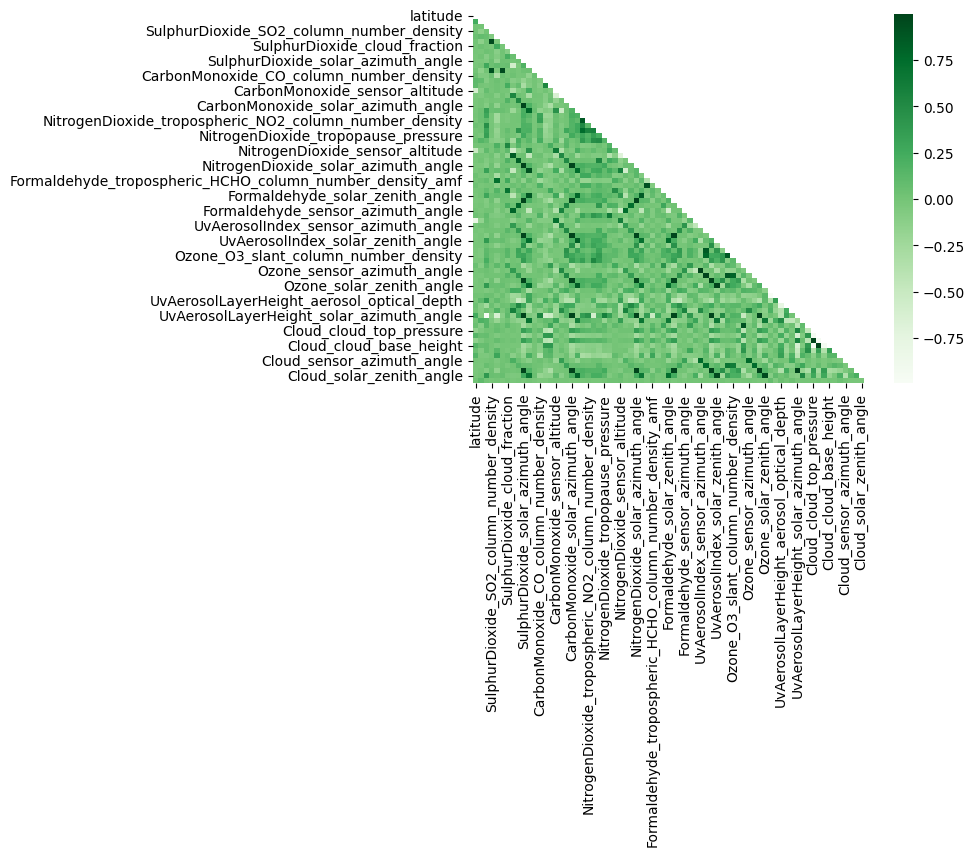

In [ ]:
# VEMOS LA CORRELACION DE LAS VARIABLES

correlation = train.corr(numeric_only = True)
sns.heatmap(correlation, mask = np.triu(np.ones_like(correlation)), cmap = 'Greens')

In [ ]:
# CORRELACION ENTRE LAS CARACTERISTICAS Y EMISIONES
correlation['emission'].sort_values(ascending = False).to_frame().style.background_gradient(cmap = 'PuBu')


#por lo que vemos muy pocas tienen un impacto en la variable emisiones

,emission
emission,1.000000
longitude,0.102746
UvAerosolLayerHeight_aerosol_height,0.069008
Cloud_surface_albedo,0.046587
Formaldehyde_tropospheric_HCHO_column_number_density_amf,0.040263
UvAerosolLayerHeight_aerosol_optical_depth,0.040156
UvAerosolLayerHeight_sensor_azimuth_angle,0.035142
NitrogenDioxide_sensor_altitude,0.027540
NitrogenDioxide_cloud_fraction,0.022456
NitrogenDioxide_absorbing_aerosol_index,0.020905


In [ ]:
# Latitud y longitud

fig = px.scatter_mapbox(train[train['year'] == 2019],
                        lat = 'latitude',
                        lon = 'longitude',
                        color = 'emission',
                        animation_frame = 'week_no',
                        zoom = 6)

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show();

#REALIZAMOS EL MAPA DE LAS EMISIONES CON LAS LOCALIZACIONES DADAS

In [ ]:
#Primero comenzamos construyendo un enfoque sin aprendizaje automático para pronosticar las emisiones en función de la ubicación y el número de semana.

train['location'] = [str(train['latitude'][i]) + '_' + str(train['longitude'][i]) for i in range(0, train.shape[0])]
test['location'] = [str(test['latitude'][i]) + '_' + str(test['longitude'][i]) for i in range(0, test.shape[0])]

train['location'] = train['location'].astype('category')
test['location'] = test['location'].astype('category')

train_agg = pd.DataFrame(train.groupby(['location', 'week_no'])['emission'].mean()).reset_index()
train_agg.head()

,location,week_no,emission
0,-0.51_29.29,0,3.608051
1,-0.51_29.29,1,4.016319
2,-0.51_29.29,2,4.138755
3,-0.51_29.29,3,4.184737
4,-0.51_29.29,4,4.247569
